In [1]:
import radiomics
from radiomics import featureextractor
import six, numpy as np
import SimpleITK as sitk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
import yaml
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, f1_score

In [2]:
data_pd = pd.read_csv('../dataset/metadata/HAM10000_metadata.csv')
data_pd.head()


lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  
3  vidir_modern  
4  vidir_modern

In [3]:
data_pd['image_id']

0        ISIC_0027419
1        ISIC_0025030
2        ISIC_0026769
3        ISIC_0025661
4        ISIC_0031633
             ...     
10010    ISIC_0033084
10011    ISIC_0033550
10012    ISIC_0033536
10013    ISIC_0032854
10014    ISIC_0032258
Name: image_id, Length: 10015, dtype: object

In [4]:
dp = data_pd[['image_id', 'dx']]
dp

image_id     dx
0      ISIC_0027419    bkl
1      ISIC_0025030    bkl
2      ISIC_0026769    bkl
3      ISIC_0025661    bkl
4      ISIC_0031633    bkl
...             ...    ...
10010  ISIC_0033084  akiec
10011  ISIC_0033550  akiec
10012  ISIC_0033536  akiec
10013  ISIC_0032854  akiec
10014  ISIC_0032258    mel

[10015 rows x 2 columns]

In [5]:
print(dp)
print(dp['image_id'][4])
print(dp['image_id'][1].split('_')[1].split('.')[0])

           image_id     dx
0      ISIC_0027419    bkl
1      ISIC_0025030    bkl
2      ISIC_0026769    bkl
3      ISIC_0025661    bkl
4      ISIC_0031633    bkl
...             ...    ...
10010  ISIC_0033084  akiec
10011  ISIC_0033550  akiec
10012  ISIC_0033536  akiec
10013  ISIC_0032854  akiec
10014  ISIC_0032258    mel

[10015 rows x 2 columns]
ISIC_0031633
0025030


In [6]:
image_dir = '../dataset/images'

In [ ]:

# params_path = os.path.join(os.getcwd(), 'Params.yaml')
# with open(params_path, 'r') as file:
#     params = yaml.safe_load(file)

# dp = []
# for i in range(len(dp)):
#     # print(im_n[i])
#     maskpath_1 =image_dir+'/'+dp['image_id'][i].split('_')[1].split('.')[0]+'_mask.jpg'
#     # print(maskpath_1)
#     impath_1 =image_dir+'/'+dp['image_id'][i].split('_')[1].split('.')[0]+'_or.jpg'
#     mask_1 = sitk.ReadImage(maskpath_1)
#     im_1 = sitk.ReadImage(impath_1)
#     single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    
#     extractor = featureextractor.RadiomicsFeatureExtractor(params)
#     extractor.disableAllFeatures()
#     extractor.enableFeatureClassByName('firstorder')
    
#     # result = extractor.execute(single_channel_image, mask_1)
#     features[i] = extractor.execute ( single_channel_image, mask_1)
    
# # A list of the valid features, sorted
# feature_names = list(sorted(filter ( lambda k: k.startswith('original_'), features[1] )))

In [10]:
samples = np.zeros((len(dp),len(feature_names)))
print(samples)
for i in range(1,len(dp)):
    a = np.array([])
    # print(a)
    for feature_name in feature_names:
        a = np.append(a, features[i][feature_name])
        print( features[i][feature_name])
        # print(a)
    print(samples[i,:].shape)
    print(a.shape)
    samples[i,:] = a

print(samples)  
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)


# corr = d.corr()

# # Set up the matplotlib figure, make it big!
# f, ax = plt.subplots(figsize=(15, 10))


# # Draw the heatmap using seaborn
# sns.heatmap(corr, vmax=1, square = True)

NameError: name 'feature_names' is not defined

In [129]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [130]:
df_count = data_pd.groupby('lesion_id').count()
df_count.head()

image_id  dx  dx_type  age  sex  localization  dataset
lesion_id                                                          
HAM_0000000         2   2        2    2    2             2        2
HAM_0000001         1   1        1    1    1             1        1
HAM_0000002         3   3        3    3    3             3        3
HAM_0000003         1   1        1    1    1             1        1
HAM_0000004         1   1        1    1    1             1        1

In [131]:
# Set the image_id as the index in data_pd
# data_pd.set_index(['image_id'], inplace=True)

In [134]:
y_train.value_counts()

dx
5     5363
2      903
4      889
1      394
0      264
6      112
3       86
Name: count, dtype: int64

In [6]:
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [7]:


for i in targetnames:
  directory1 = i
  os.makedirs(directory1, exist_ok=True)


In [11]:
img_list = list(data_pd['image_id'])
# print(img_list)

In [9]:
image_dir  = '../dataset/images'

In [253]:
import glob
import cv2
imgPath = []
for img in glob.glob(image_dir+'/*.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print(len(imgPath))


10015


when only reading the  imagess to run the pyradiomics


In [ ]:
import glob
import cv2
imgPath = []
for img in glob.glob(image_dir+'/ISIC_*_or.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print((imgPath))


['../dataset/images/0024652_or.jpg', '../dataset/images/0024990_or.jpg', '../dataset/images/0026702_or.jpg', '../dataset/images/0030559_or.jpg', '../dataset/images/0030365_or.jpg', '../dataset/images/0030619_or.jpg', '../dataset/images/0029650_or.jpg', '../dataset/images/0024714_or.jpg', '../dataset/images/0032954_or.jpg', '../dataset/images/0029352_or.jpg', '../dataset/images/0027422_or.jpg', '../dataset/images/0028567_or.jpg', '../dataset/images/0032925_or.jpg', '../dataset/images/0025446_or.jpg', '../dataset/images/0034313_or.jpg', '../dataset/images/0026670_or.jpg', '../dataset/images/0026660_or.jpg', '../dataset/images/0031616_or.jpg', '../dataset/images/0029696_or.jpg', '../dataset/images/0027918_or.jpg', '../dataset/images/0029725_or.jpg', '../dataset/images/0025972_or.jpg', '../dataset/images/0030801_or.jpg', '../dataset/images/0026682_or.jpg', '../dataset/images/0025154_or.jpg', '../dataset/images/0033707_or.jpg', '../dataset/images/0032270_or.jpg', '../dataset/images/0031019_

In [11]:
im_n = imgPath
print(im_n)
print(im_n[2].split('.')[2].split('_'))


['../dataset/images/0024652_or.jpg', '../dataset/images/0024990_or.jpg', '../dataset/images/0026702_or.jpg', '../dataset/images/0030559_or.jpg', '../dataset/images/0030365_or.jpg', '../dataset/images/0030619_or.jpg', '../dataset/images/0029650_or.jpg', '../dataset/images/0024714_or.jpg', '../dataset/images/0032954_or.jpg', '../dataset/images/0029352_or.jpg', '../dataset/images/0027422_or.jpg', '../dataset/images/0028567_or.jpg', '../dataset/images/0032925_or.jpg', '../dataset/images/0025446_or.jpg', '../dataset/images/0034313_or.jpg', '../dataset/images/0026670_or.jpg', '../dataset/images/0026660_or.jpg', '../dataset/images/0031616_or.jpg', '../dataset/images/0029696_or.jpg', '../dataset/images/0027918_or.jpg', '../dataset/images/0029725_or.jpg', '../dataset/images/0025972_or.jpg', '../dataset/images/0030801_or.jpg', '../dataset/images/0026682_or.jpg', '../dataset/images/0025154_or.jpg', '../dataset/images/0033707_or.jpg', '../dataset/images/0032270_or.jpg', '../dataset/images/0031019_

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

im_n = imgPath
imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}

for i in range(len(im_n)):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(ll)
    # print(str(labelPath), type(ll))
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    mask = image.load_img(labelPath, color_mode='grayscale')
    mask = image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    im = image.load_img(im_n[i], target_size=(224, 224))
    im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), 2)
    # plt.imshow(img_with_contours)
    # plt.show()
    # plt.imsave(image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_mask.jpg', img_with_contours)
    # plt.imsave(image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg', t)


0032832
0025961
0027125
0032612
0030418
0028021
0026957
0034185
0029868
0029824
0025804
0031811
0025307
0025081
0027402
0032608
0024517
0027260
0025862
0031848
0031639
0024738
0026574
0027684
0032977
0028133
0024596
0032811
0029833
0033929
0025654
0030481
0025805
0029311
0031286
0032918
0032757
0032702
0024814
0028726
0028202
0025992
0026851
0029996
0032985
0029087
0027592
0026959
0028681
0025120
0029652
0032767
0024635
0027570
0033608
0032385
0027407
0027090
0029668
0032220
0032838
0024362
0031427
0031976
0024421
0029000
0031279
0033158
0024871
0029650
0031608
0032705
0031810
0024331
0033385
0025200
0026725
0024903
0027720
0027819
0032473
0025495
0031176
0024412
0027888
0028378
0030049
0026062
0027442
0025385
0028008
0028655
0032216
0029669
0024413
0029239
0029518
0030546
0024717
0029079
0032851
0025829
0031198
0027235
0027469
0028997
0029439
0033912
0029558
0030272
0025517
0025819
0028883
0028316
0028933
0033174
0029195
0024793
0032646
0024832
0032960
0026998
0031369
0033820
0025515


SystemError: <built-in function ReadImage> returned a result with an exception set

In [13]:

import glob
import cv2

imgPath = []
for img in glob.glob(image_dir+'/*.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print((imgPath))


['../dataset/images/ISIC_0032832.jpg', '../dataset/images/ISIC_0025961.jpg', '../dataset/images/ISIC_0027125.jpg', '../dataset/images/ISIC_0032612.jpg', '../dataset/images/ISIC_0030418.jpg', '../dataset/images/ISIC_0028021.jpg', '../dataset/images/ISIC_0026957.jpg', '../dataset/images/ISIC_0034185.jpg', '../dataset/images/ISIC_0029868.jpg', '../dataset/images/ISIC_0029824.jpg', '../dataset/images/ISIC_0025804.jpg', '../dataset/images/ISIC_0031811.jpg', '../dataset/images/ISIC_0025307.jpg', '../dataset/images/ISIC_0025081.jpg', '../dataset/images/ISIC_0027402.jpg', '../dataset/images/ISIC_0032608.jpg', '../dataset/images/ISIC_0024517.jpg', '../dataset/images/ISIC_0027260.jpg', '../dataset/images/ISIC_0025862.jpg', '../dataset/images/ISIC_0031848.jpg', '../dataset/images/ISIC_0031639.jpg', '../dataset/images/ISIC_0024738.jpg', '../dataset/images/ISIC_0026574.jpg', '../dataset/images/ISIC_0027684.jpg', '../dataset/images/ISIC_0032977.jpg', '../dataset/images/ISIC_0028133.jpg', '../dataset

In [ ]:
# from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

im_n = imgPath
imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}

for i in range(len(im_n)):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(ll)
    # print(str(labelPath), type(ll))
    imagePAth = imagepath+str(ll)+'.jpg'
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    # Image.open
    # mask = Image.load_img(labelPath, color_mode='grayscale')
    # mask = Image.open(labelPath)
    mask = cv2.imread(labelPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) 

    # mask = Image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    # im = image.load_img(im_n[i], target_size=(224, 224))
    # im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), 2)
    # plt.imshow(img_with_contours)
    # plt.show()

    m = cv2.imread(labelPath, 0) 
    kernel = np.ones((25, 25), np.uint8) 
    img_dilation = cv2.dilate(m, kernel, iterations=1) 
    # cv2.imshow('Dilation', img_dilation) 
    mask_contours_d, _ = cv2.findContours((img_dilation * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img_with_contours, mask_contours_d, -1, (0, 255, 0), 2)
    # plt.imshmg_with_contours)
    # plt.show()ow(i
    plt.imsave('../dataset/mask_ring/'+im_n[i].split('_')[1].split('.')[0]+'_mask_ring.jpg', img_with_contours)


# im_n = imgPath
# imagepath = image_dir+'/ISIC_' #0024310.jpg'
# labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

# features ={}

# for i in range(10):
#     img = sitk.ReadImage(im_n[i])
#     # print(img)
#     ll = im_n[i].split('_')[1].split('.')[0]
#     print(ll)
#     # print(str(labelPath), type(ll))
#     labelPath = labelpath+str(ll)+'_segmentation.png'
#     label = sitk.ReadImage(labelPath)
#     mask = image.load_img(labelPath, color_mode='grayscale')
#     mask = image.img_to_array(mask) / 255.0
#     mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     m = cv2.imread(labelPath, 0) 
#     kernel = np.ones((25, 25), np.uint8) 
#     img_dilation = cv2.dilate(m, kernel, iterations=1) 
#     cv2.imshow('Dilation', img_dilation) 
#     mask_contours_d, _ = cv2.findContours((img_dilation * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # plt.imshow(img_dilation)
#     # plt.show()
#     im = image.load_img(im_n[i], target_size=(224, 224))
#     im = image.img_to_array(im)
#     # t = c
#     img_with_contours = t.copy()
#     # # Draw the border of the segmentation mask with a blue line

#     cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), 2)
#     # plt.imshow(img_with_contours)
#     # plt.show()
#     # cv2.drawContours(img_with_contours, mask_contours_d, -1, (0, 255, 0), 2)
# # imgg = cv2.dilate(m ask_contours, (15,15), 5)

#     cutter_size = 5
#     # contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     # imgg = erode_contours_by_cutter_size(mask, mask_contours, cutter_size)
#     # cv2.imshow('img', imgg)
#     plt.imshow(img_with_contours)
#     plt.show()
    # plt.imsave('../dataset/mask_ring/'+im_n[i].split('_')[1].split('.')[0]+'_mask_ring.jpg', img_with_contours)
    # plt.show()
    # plt.imsave(image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_mask.jpg', img_with_contours)
    # plt.imsave(image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg', t)


0032832
0025961
0027125
0032612
0030418
0028021
0026957
0034185
0029868
0029824
0025804
0031811
0025307
0025081
0027402
0032608
0024517
0027260
0025862
0031848
0031639
0024738
0026574
0027684
0032977
0028133
0024596
0032811
0029833
0033929
0025654
0030481
0025805
0029311
0031286
0032918
0032757
0032702
0024814
0028726
0028202
0025992
0026851
0029996
0032985
0029087
0027592
0026959
0028681
0025120
0029652
0032767
0024635
0027570
0033608
0032385
0027407
0027090
0029668
0032220
0032838
0024362
0031427
0031976
0024421
0029000
0031279
0033158
0024871
0029650
0031608
0032705
0031810
0024331
0033385
0025200
0026725
0024903
0027720
0027819
0032473
0025495
0031176
0024412
0027888
0028378
0030049
0026062
0027442
0025385
0028008
0028655
0032216
0029669
0024413
0029239
0029518
0030546
0024717
0029079
0032851
0025829
0031198
0027235
0027469
0028997
0029439
0033912
0029558
0030272
0025517
0025819
0028883
0028316
0028933
0033174
0029195
0024793
0032646
0024832
0032960
0026998
0031369
0033820
0025515


In [230]:
im_n[1].split('_')[0]


'../dataset/images/ISIC'

In [50]:
print(len(im_n))

10014


In [30]:
imgPath = []
for img in glob.glob('../dataset/images/contoured/*_or.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(img)
print((imgPath))


['../dataset/images/contoured/0024652_or.jpg', '../dataset/images/contoured/0024990_or.jpg', '../dataset/images/contoured/0026702_or.jpg', '../dataset/images/contoured/0030559_or.jpg', '../dataset/images/contoured/0030365_or.jpg', '../dataset/images/contoured/0030619_or.jpg', '../dataset/images/contoured/0029650_or.jpg', '../dataset/images/contoured/0024714_or.jpg', '../dataset/images/contoured/0032954_or.jpg', '../dataset/images/contoured/0029352_or.jpg', '../dataset/images/contoured/0027422_or.jpg', '../dataset/images/contoured/0028567_or.jpg', '../dataset/images/contoured/0032925_or.jpg', '../dataset/images/contoured/0025446_or.jpg', '../dataset/images/contoured/0034313_or.jpg', '../dataset/images/contoured/0026670_or.jpg', '../dataset/images/contoured/0026660_or.jpg', '../dataset/images/contoured/0031616_or.jpg', '../dataset/images/contoured/0029696_or.jpg', '../dataset/images/contoured/0027918_or.jpg', '../dataset/images/contoured/0029725_or.jpg', '../dataset/images/contoured/0025

In [31]:
import yaml

params_path = os.path.join(os.getcwd(), 'Params.yaml')
with open(params_path, 'r') as file:
    params = yaml.safe_load(file)

features ={}
im_n = imgPath
for i in range(len(im_n)):
    # print(im_n[i])

    # maskpath_1 =image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_mask.jpg'
    maskpath_1 =im_n[i].split('_')[0]+'_mask.jpg'
    

    # print(maskpath_1)
    # impath_1 =image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg'
    impath_1 =im_n[i].split('_')[0]+'_or.jpg'

    mask_1 = sitk.ReadImage(maskpath_1)
    im_1 = sitk.ReadImage(impath_1)
    single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    
    extractor = featureextractor.RadiomicsFeatureExtractor(params)
    extractor.disableAllFeatures()
    # extractor.enableAllFeatures()
    extractor.enableFeatureClassByName('firstorder', 'shape2D')
    extractor.enableFeatureClassByName( 'ngtdm')
    extractor.enableFeatureClassByName('gldm')
    extractor.enableFeatureClassByName('glszm','glrlm')

    # result = extractor.execute(single_channel_image, mask_1)
    features[i] = extractor.execute ( single_channel_image, mask_1)
    
# A list of the valid features, sorted
# feature_names = list(sorted( features[1]))


In [32]:
feature_names = list(sorted(filter ( lambda k: k.startswith('original_'), features[1] )))


In [77]:

len(feature_names)

53

In [24]:
# for i in range(len(im_n)):
#     # print(im_n[i])
#     # maskpath_1 =image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_mask.jpg'
#     maskpath_1 =im_n[i].split('_')[0]+'_mask.jpg'
    

#     # print(maskpath_1)
#     # impath_1 =image_dir+'/'+im_n[i].split('_')[1].split('.')[0]+'_or.jpg'
#     impath_1 =im_n[i].split('_')[0]+'_or.jpg'

#     mask_1 = sitk.ReadImage(maskpath_1)
#     im_1 = sitk.ReadImage(impath_1)
#     single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    
#     extractor = featureextractor.RadiomicsFeatureExtractor(params)
#     extractor.disableAllFeatures()
#     extractor.enableFeatureClassByName('firstorder')
    
#     # result = extractor.execute(single_channel_image, mask_1)
#     features[i] = extractor.execute ( single_channel_image, mask_1)
    
# # A list of the valid features, sorted
# feature_names = list(sorted(filter ( lambda k: k.startswith('original_'), features[1] )))



In [25]:
len(features)

10014

In [26]:
# feature_names_all.pop(17)


In [27]:
# feature_names_all.pop(18)
# feature_names_all.pop(19)
# feature_names_all.pop(20)
# feature_names_all.pop(21)

# feature_names_all 

In [28]:
# feature_names_all 

(1, 53)


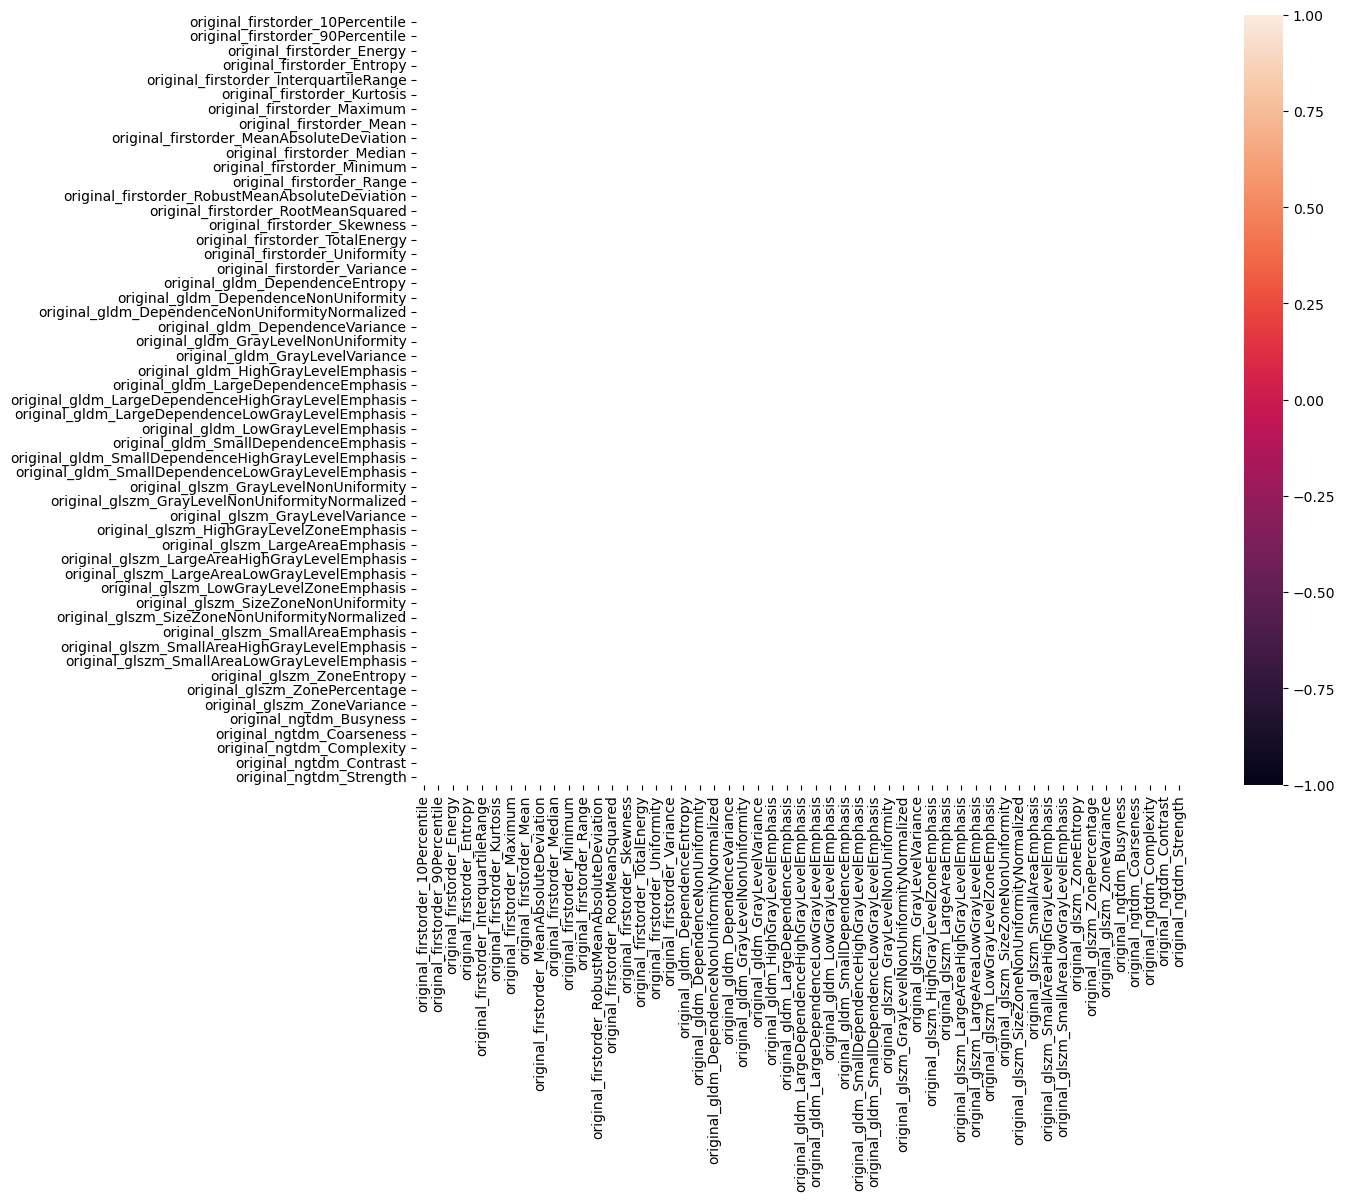

In [106]:
# import seaborn as sns
# import matplotlib.pyplot as plt

samples = np.zeros((len(im_n),len(feature_names)))
print(samples.shape)

for i in range(1,len(im_n)):
    # print(i)
    a = np.array([])
    
    for feature_name in feature_names:
        a = np.append(a, features[i][feature_name])
        # print(a)
    # print(a.shape)
    samples[i,:] = a
# print(samples)  
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)

corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))


# Draw the heatmap using seaborn
sns.heatmap(corr, vmin= -1, vmax=1, square = True)
plt.savefig('../presentation/heatmap.png', dpi= 100)
plt.show()

In [30]:
corr_matrix = d.corr().abs()




In [31]:
# get upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find features with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# drop highly correlated features

d.drop(to_drop, axis=1, inplace=True)

In [32]:
ds = d.iloc[:10015,:]

In [33]:
d

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                                   0.0                               0.0   
1                                 107.0                             126.0   
2                                  74.6                             163.0   
3                                 147.0                             163.0   
4                                 130.0                             173.6   
...                                 ...                               ...   
10009                             161.0                             179.0   
10010                             149.0                             174.0   
10011                              96.0                             133.0   
10012                             144.8                             164.0   
10013                             107.0                             124.8   

       original_firstorder_Energy  original_firstorder_Entropy  \
0                             0.0                     0.000000   
1                       2460379.0                     3.789898   
2                       1939278.0                     5.419006   
3                       2850345.0                     3.552938   
4                       3737314.0                     4.842377   
...                           ...                          ...   
10009                   1967770.0                     3.682477   
10010                   3015135.0                     4.133477   
10011                   3037568.0                     4.777251   
10012                   4522944.0                     3.769551   
10013                   1487674.0                     3.785573   

       original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                                         0.0                      0.000000   
1                                        10.0                      2.918465   
2                                        63.0                      3.106771   
3                                         9.0                      5.546461   
4                                        21.0                     14.150706   
...                                       ...                           ...   
10009                                    11.0                      2.261900   
10010                                    12.0                      2.547416   
10011                                    20.0                      3.276223   
10012                                     8.0                      4.016996   
10013                                    11.0                     50.791596   

       original_firstorder_Maximum  original_firstorder_Mean  \
0                              0.0                  0.000000   
1                            136.0                115.086486   
2                            181.0                112.102190   
3                            186.0                155.940171   
4                            195.0                146.569697   
...                            ...                       ...   
10009                        186.0                169.970588   
10010                        182.0                162.359649   
10011                        164.0                117.290323   
10012                        173.0                154.518519   
10013                        142.0                114.000000   

       original_firstorder_MeanAbsoluteDeviation  original_firstorder_Minimum  \
0                                       0.000000                          0.0   
1                                       5.948692                         99.0   
2                                      33.292877                          0.0   
3                                       5.069910                        140.0   
4                                      18.549348                          1.0   
...                                          ...                          ...   
1000

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each feature

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]

vif["features"] = d.columns

# print VIF values

print(vif)

/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


     VIF Factor                                           features
0    274.311422                   original_firstorder_10Percentile
1    590.218123                   original_firstorder_90Percentile
2     58.081743                         original_firstorder_Energy
3   5502.299158                        original_firstorder_Entropy
4     16.425539             original_firstorder_InterquartileRange
5     10.627881                       original_firstorder_Kurtosis
6           inf                        original_firstorder_Maximum
7   2106.205897                           original_firstorder_Mean
8    203.079161          original_firstorder_MeanAbsoluteDeviation
9           inf                        original_firstorder_Minimum
10          inf                          original_firstorder_Range
11    62.516649    original_firstorder_RobustMeanAbsoluteDeviation
12    18.347443                       original_firstorder_Skewness
13   538.124462                     original_firstorder_Unifor

In [34]:
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032214'].index, inplace = True)
        
# print(data_pd)
d_radiomics = dp.merge(d.set_index(data_pd['image_id']), on = 'image_id')

X = d_radiomics.drop(['image_id', 'dx'], axis = 1)
dp = data_pd[['image_id', 'dx']]
print(dp)
y = d_radiomics['dx']

           image_id     dx
0      ISIC_0027419    bkl
1      ISIC_0025030    bkl
2      ISIC_0026769    bkl
3      ISIC_0025661    bkl
4      ISIC_0031633    bkl
...             ...    ...
10010  ISIC_0033084  akiec
10011  ISIC_0033550  akiec
10012  ISIC_0033536  akiec
10013  ISIC_0032854  akiec
10014  ISIC_0032258    mel

[10014 rows x 2 columns]


In [104]:
codes = {'akiec':0, 'bcc':1, 'bkl':2, 'df':3, 'mel':4, 'nv':5, 'vasc':6}

y = y.map(codes) 


50

In [102]:
y = d_radiomics['dx']

In [103]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

# define number of features to keep

k = 30

# perform feature selection

X_new = SelectKBest(f_regression, k=k).fit_transform(d, y)

# get feature names of selected features

selected_features = d.columns[SelectKBest(f_regression, k=k).fit(d, y).get_support()]

# print selected features

print(selected_features)

ValueError: Expected 2D array, got scalar array instead:
array=50.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
data_pd['image_id']

0        ISIC_0027419
1        ISIC_0025030
2        ISIC_0026769
3        ISIC_0025661
4        ISIC_0031633
             ...     
10010    ISIC_0033084
10011    ISIC_0033550
10012    ISIC_0033536
10013    ISIC_0032854
10014    ISIC_0032258
Name: image_id, Length: 10015, dtype: object

In [36]:
data_pd

lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

            dataset  
0      vidir_modern  
1      vidir_modern  
2      vidir_modern  
3      vidir_modern  
4      vidir_modern  
...             ...  
10010  vidir_modern  
10011  vidir_modern  
10012  vidir_modern  
10013  vidir_modern  
10014  vidir_modern  

[10014 rows x 8 columns]

In [37]:
data_pd.drop( data_pd[data_pd['image_id'] == 'ISIC_0032214'].index, inplace = True)
        
# print(data_pd)


In [38]:
dp = data_pd[['image_id', 'dx']]
print(dp)

           image_id     dx
0      ISIC_0027419    bkl
1      ISIC_0025030    bkl
2      ISIC_0026769    bkl
3      ISIC_0025661    bkl
4      ISIC_0031633    bkl
...             ...    ...
10010  ISIC_0033084  akiec
10011  ISIC_0033550  akiec
10012  ISIC_0033536  akiec
10013  ISIC_0032854  akiec
10014  ISIC_0032258    mel

[10014 rows x 2 columns]


In [39]:
d_radiomics = dp.merge(d.set_index(data_pd['image_id']), on = 'image_id')

In [40]:
d_radiomics.iloc[:,2:]

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                                   0.0                               0.0   
1                                 107.0                             126.0   
2                                  74.6                             163.0   
3                                 147.0                             163.0   
4                                 130.0                             173.6   
...                                 ...                               ...   
10009                             161.0                             179.0   
10010                             149.0                             174.0   
10011                              96.0                             133.0   
10012                             144.8                             164.0   
10013                             107.0                             124.8   

       original_firstorder_Energy  original_firstorder_Entropy  \
0                             0.0                     0.000000   
1                       2460379.0                     3.789898   
2                       1939278.0                     5.419006   
3                       2850345.0                     3.552938   
4                       3737314.0                     4.842377   
...                           ...                          ...   
10009                   1967770.0                     3.682477   
10010                   3015135.0                     4.133477   
10011                   3037568.0                     4.777251   
10012                   4522944.0                     3.769551   
10013                   1487674.0                     3.785573   

       original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                                         0.0                      0.000000   
1                                        10.0                      2.918465   
2                                        63.0                      3.106771   
3                                         9.0                      5.546461   
4                                        21.0                     14.150706   
...                                       ...                           ...   
10009                                    11.0                      2.261900   
10010                                    12.0                      2.547416   
10011                                    20.0                      3.276223   
10012                                     8.0                      4.016996   
10013                                    11.0                     50.791596   

       original_firstorder_Maximum  original_firstorder_Mean  \
0                              0.0                  0.000000   
1                            136.0                115.086486   
2                            181.0                112.102190   
3                            186.0                155.940171   
4                            195.0                146.569697   
...                            ...                       ...   
10009                        186.0                169.970588   
10010                        182.0                162.359649   
10011                        164.0                117.290323   
10012                        173.0                154.518519   
10013                        142.0                114.000000   

       original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  \
0                                       0.000000                         0.0   
1                                       5.948692                       114.0   
2                                      33.292877                       107.0   
3                                       5.069910                       156.0   
4                                      18.549348                       150.0   
...                                          ...                         ...   
10009      

In [66]:
ds.set_index(data_pd['image_id'])

NameError: name 'ds' is not defined

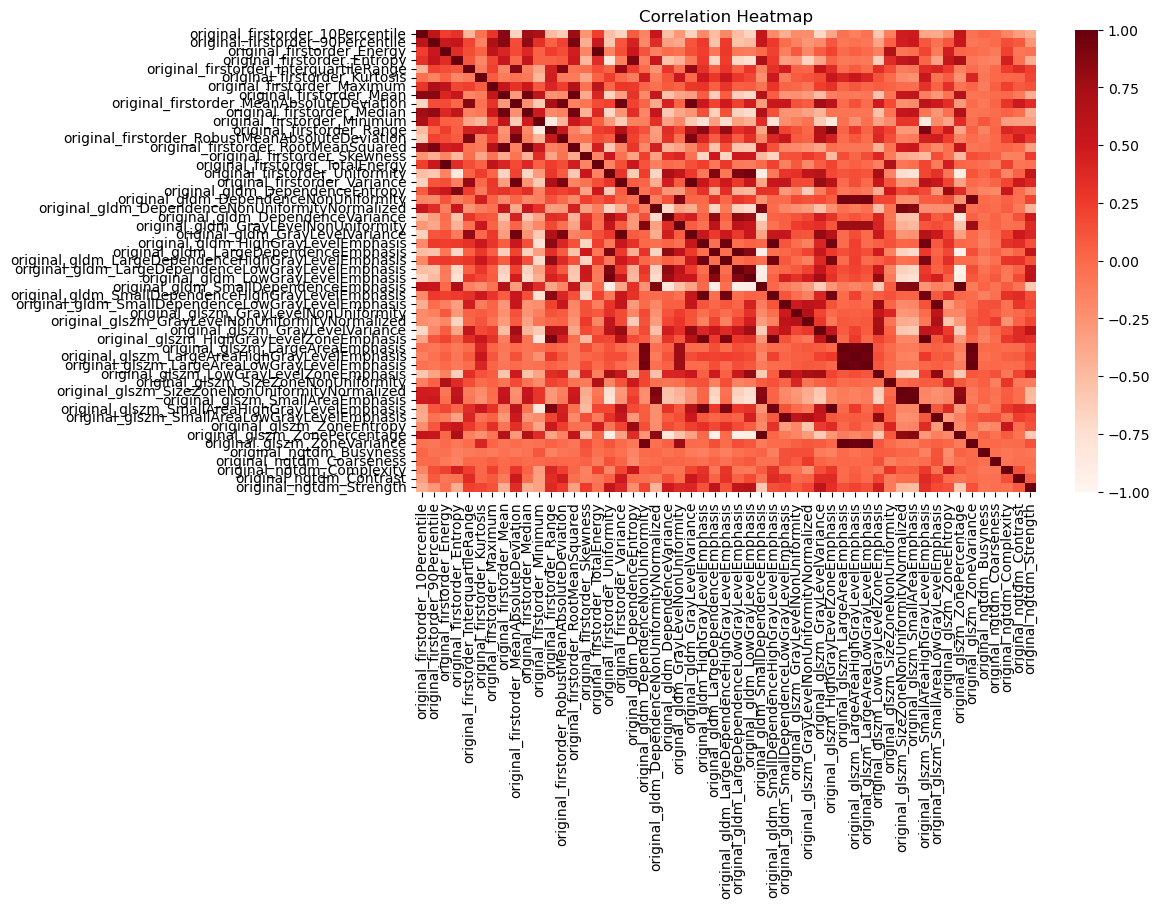

In [67]:

corr = d_radiomics.iloc[:,2:].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Reds",
            vmin=-1,
            vmax=1,
            # annot=True
            )
plt.title("Correlation Heatmap")
plt.show()

In [42]:
X = d_radiomics.drop(['image_id', 'dx'], axis = 1)
y = d_radiomics['dx']

In [43]:
X

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                                   0.0                               0.0   
1                                 107.0                             126.0   
2                                  74.6                             163.0   
3                                 147.0                             163.0   
4                                 130.0                             173.6   
...                                 ...                               ...   
10009                             161.0                             179.0   
10010                             149.0                             174.0   
10011                              96.0                             133.0   
10012                             144.8                             164.0   
10013                             107.0                             124.8   

       original_firstorder_Energy  original_firstorder_Entropy  \
0                             0.0                     0.000000   
1                       2460379.0                     3.789898   
2                       1939278.0                     5.419006   
3                       2850345.0                     3.552938   
4                       3737314.0                     4.842377   
...                           ...                          ...   
10009                   1967770.0                     3.682477   
10010                   3015135.0                     4.133477   
10011                   3037568.0                     4.777251   
10012                   4522944.0                     3.769551   
10013                   1487674.0                     3.785573   

       original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                                         0.0                      0.000000   
1                                        10.0                      2.918465   
2                                        63.0                      3.106771   
3                                         9.0                      5.546461   
4                                        21.0                     14.150706   
...                                       ...                           ...   
10009                                    11.0                      2.261900   
10010                                    12.0                      2.547416   
10011                                    20.0                      3.276223   
10012                                     8.0                      4.016996   
10013                                    11.0                     50.791596   

       original_firstorder_Maximum  original_firstorder_Mean  \
0                              0.0                  0.000000   
1                            136.0                115.086486   
2                            181.0                112.102190   
3                            186.0                155.940171   
4                            195.0                146.569697   
...                            ...                       ...   
10009                        186.0                169.970588   
10010                        182.0                162.359649   
10011                        164.0                117.290323   
10012                        173.0                154.518519   
10013                        142.0                114.000000   

       original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  \
0                                       0.000000                         0.0   
1                                       5.948692                       114.0   
2                                      33.292877                       107.0   
3                                       5.069910                       156.0   
4                                      18.549348                       150.0   
...                                          ...                         ...   
10009      

In [45]:
y

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10009    akiec
10010    akiec
10011    akiec
10012    akiec
10013      mel
Name: dx, Length: 10014, dtype: object

In [46]:
codes = {'akiec':0, 'bcc':1, 'bkl':2, 'df':3, 'mel':4, 'nv':5, 'vasc':6}

y = y.map(codes) 


In [48]:
from imblearn.over_sampling import RandomOverSampler    # to balance an imbalanced dataset.
# Initializing the RandomOverSampler object with a specified random_state for reproducibility.
ROS = RandomOverSampler(random_state = 42)

# This method generates a balanced dataset by oversampling the minority class
x_resampled, y_resampled = ROS.fit_resample(X, y)

In [50]:
from sklearn.model_selection import train_test_split
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [41]:
y_test.value_counts()

dx
5    1342
4     223
2     196
1     120
0      63
6      30
3      29
Name: count, dtype: int64

In [119]:
y_train, y_test

(5775    5
 8645    5
 2470    1
 1624    4
 3730    5
        ..
 9225    5
 4859    5
 3264    5
 9845    0
 2732    1
 Name: dx, Length: 8011, dtype: int64,
 5886    5
 6283    5
 7694    5
 3010    5
 5528    5
        ..
 4695    5
 1578    4
 4955    5
 9262    5
 7153    5
 Name: dx, Length: 2003, dtype: int64)

In [51]:
from sklearn.preprocessing import StandardScaler

#scaling and centering the data
sc = StandardScaler()
X_train_scaled_n = sc.fit_transform(X_train_n)
X_test_scaled_n = sc.transform(X_test_n)

In [42]:
from sklearn.preprocessing import StandardScaler

#scaling and centering the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [197]:
d_radiomics.columns

Index(['image_id', 'dx', 'original_firstorder_10Percentile',
       'original_firstorder_90Percentile', 'original_firstorder_Energy',
       'original_firstorder_Entropy', 'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation',
       'original_firstorder_Minimum', 'original_firstorder_Range',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_firstorder_Uniformity',
       'original_gldm_DependenceEntropy',
       'original_gldm_DependenceNonUniformity',
       'original_gldm_DependenceNonUniformityNormalized',
       'original_gldm_DependenceVariance',
       'original_gldm_GrayLevelNonUniformity',
       'original_gldm_HighGrayLevelEmphasis',
       'original_gldm_LargeDependenceEmphasis',
       'original_gldm_LowGrayLevelEmphasis',
       'original_gldm_SmallDependenceEmphasis',
       'origi

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (53,) and arg 1 with shape (38,).

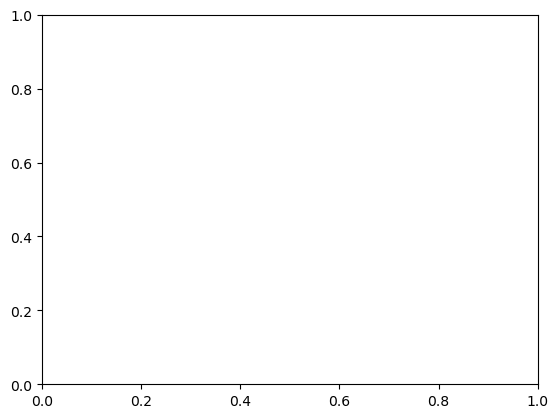

In [198]:
# calculate covariance matrix, eigenvalues and eigenvectors
cov_mat = np.cov(X_train_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

exp_var = []

# Sort the eigenvalues in descending order
eigen_vals = np.sort(eigen_vals)[::-1]

for i in eigen_vals:
  var = (i / np.sum(eigen_vals)) * 100
  exp_var.append(var)

bar = plt.bar(range( len(feature_names)), exp_var, align='center',
        label='Individual explained variance')

# Adding data labels to the top of bars 
for i, bar in enumerate(bar):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{exp_var[i]:.1f}%', 
             ha='center', va='bottom')

plt.ylabel('Percentage of variance explained (%)')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(len(feature_names))))
plt.legend(loc='best')
plt.tight_layout()

Text(0.5, 1.0, 'Scree Plot')

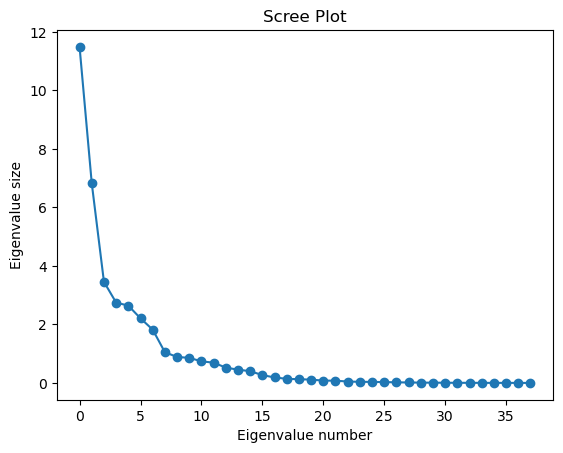

In [199]:
from sklearn.decomposition import PCA

# generate scree plot
pca = PCA()
X_train = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [45]:
component_weights = pca.components_
print(component_weights)

[[-2.27971629e-01 -1.48679087e-01 -2.71222094e-02 ... -3.69010364e-03
   7.69083659e-02  1.90151755e-01]
 [-6.75340358e-02  1.93219648e-01  1.90274497e-01 ...  2.11133307e-01
   1.32416434e-01  8.24356029e-03]
 [-9.08372302e-02  8.27719122e-02 -1.36859496e-01 ... -7.25703018e-02
   1.66652923e-01 -6.45803426e-02]
 ...
 [ 1.60776637e-02 -1.60538850e-02  9.10484253e-03 ... -7.09438992e-03
   9.46729875e-04  3.41557799e-03]
 [-9.64930095e-03  8.87007618e-03  1.02730804e-02 ...  6.07841541e-04
  -2.15437397e-03 -8.79399348e-04]
 [ 0.00000000e+00  6.74325457e-15  4.01026193e-15 ...  6.05464887e-16
   1.43665749e-15  6.75427204e-16]]


In [46]:
# Create a mapping between component weights and feature names
feature_weights_mapping = {}
for i, component in enumerate(component_weights):
  component_feature_weights = zip(feature_names, component)
  sorted_feature_weight = sorted(
      component_feature_weights, key=lambda x: abs(x[1]), reverse=True)
  feature_weights_mapping[f"Component {i+1}"] = sorted_feature_weight
  
# Accessing feature names contributing to Principal Component
print("Feature names contributing to Principal Components")
for feature, weight in feature_weights_mapping.items():
  print(f"{feature}: {weight}")

Feature names contributing to Principal Components
Component 1: [('original_gldm_DependenceVariance', np.float64(0.28139086739240865)), ('original_firstorder_RootMeanSquared', np.float64(0.2593416705022752)), ('original_gldm_GrayLevelNonUniformity', np.float64(-0.2578749261708604)), ('original_gldm_LargeDependenceHighGrayLevelEmphasis', np.float64(0.24233528181389058)), ('original_gldm_SmallDependenceEmphasis', np.float64(0.24220964790222335)), ('original_gldm_DependenceNonUniformityNormalized', np.float64(0.2372391237377634)), ('original_firstorder_10Percentile', np.float64(-0.22797162947318605)), ('original_gldm_SmallDependenceLowGrayLevelEmphasis', np.float64(-0.22410324487806493)), ('original_firstorder_Uniformity', np.float64(-0.22410008716254506)), ('original_firstorder_Mean', np.float64(-0.22269878396947804)), ('original_firstorder_Variance', np.float64(0.2178800568435649)), ('original_firstorder_Entropy', np.float64(-0.1984688464964518)), ('original_glszm_LargeAreaHighGrayLevel

In [53]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC


In [48]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_train = pd.DataFrame(y_train)
final_pca_df = pca_df
final_pca_df['target'] = y_train

In [54]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
# svm.fit(final_pca_df.iloc[:,:2],final_pca_df['target'])



In [ ]:
y_train

In [ ]:
svm = SVC(kernel="poly", gamma=0.5, C=1.0)



/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.5, kernel='poly')

In [56]:
svm.fit(X_train_scaled_n,y_train_n.values)


SVC(gamma=0.5)

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       137
           1       0.67      0.70      0.69       122
           2       0.67      0.54      0.60       136
           3       0.96      1.00      0.98       116
           4       0.64      0.51      0.57       130
           5       0.47      0.44      0.46       140
           6       0.89      0.99      0.94       158

    accuracy                           0.73       939
   macro avg       0.72      0.73      0.72       939
weighted avg       0.72      0.73      0.72       939



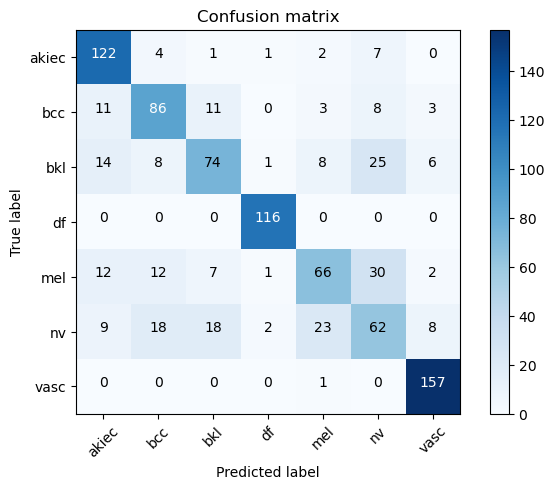

In [79]:
x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
svm.fit(x_val_n, y_val_n.values)
y_pre_nn = svm.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
# xp = classification_report(y_test_nn,y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_svm_rbf.png', dpi = 100)
plt.show()

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test_nn, y_pre_nn))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       137
           1       0.67      0.70      0.69       122
           2       0.67      0.54      0.60       136
           3       0.96      1.00      0.98       116
           4       0.64      0.51      0.57       130
           5       0.47      0.44      0.46       140
           6       0.89      0.99      0.94       158

    accuracy                           0.73       939
   macro avg       0.72      0.73      0.72       939
weighted avg       0.72      0.73      0.72       939



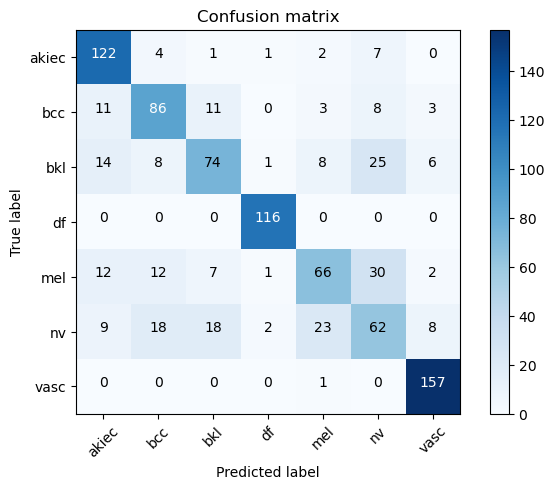

In [60]:
# confusion_mtx = confusion_matrix(y_test_n,y_predict_n)
# plot the confusion matrix
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
# plt.savefig('../presentation/conf_mat_svm_rbf.png', dpi = 100)
plt.show()

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [89]:
clf = RandomForestClassifier( random_state=42)

In [88]:
x_resampled.isnull().sum()

original_firstorder_10Percentile                      0
original_firstorder_90Percentile                      0
original_firstorder_Energy                            0
original_firstorder_Entropy                           0
original_firstorder_InterquartileRange                0
original_firstorder_Kurtosis                          0
original_firstorder_Maximum                           0
original_firstorder_Mean                              0
original_firstorder_MeanAbsoluteDeviation             0
original_firstorder_Median                            0
original_firstorder_Minimum                           0
original_firstorder_Range                             0
original_firstorder_RobustMeanAbsoluteDeviation       0
original_firstorder_RootMeanSquared                   0
original_firstorder_Skewness                          0
original_firstorder_TotalEnergy                       0
original_firstorder_Uniformity                        0
original_firstorder_Variance                    

In [93]:
param_grid = { 
    # 'n_estimators': [200, 500],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' : [2,4,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
# .fit(x_train, y_train)

# xp = classification_report(y_test_nn,y_pre_nn)

# clf.fit(X, y)

In [98]:

x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
clf.fit(x_val_n, y_val_n.values)
y_pre_nn = clf.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)



0.8359957401490948

In [ ]:
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
plt.savefig('../presentation/conf_mat_rfc.png', dpi = 100)
plt.show()

In [ ]:

x_val_n, x_test_nn, y_val_n, y_test_nn = train_test_split(X_test_scaled_n, y_test_n, test_size=0.1, random_state=42 )  
CV_rfc.fit(x_val_n, y_val_n.values)
y_pre_nn = cv_rfc.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)



0.7273695420660277

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       137
           1       0.84      0.93      0.88       122
           2       0.75      0.72      0.73       136
           3       0.97      1.00      0.99       116
           4       0.75      0.73      0.74       130
           5       0.57      0.49      0.53       140
           6       1.00      0.99      1.00       158

    accuracy                           0.84       939
   macro avg       0.83      0.84      0.83       939
weighted avg       0.83      0.84      0.83       939



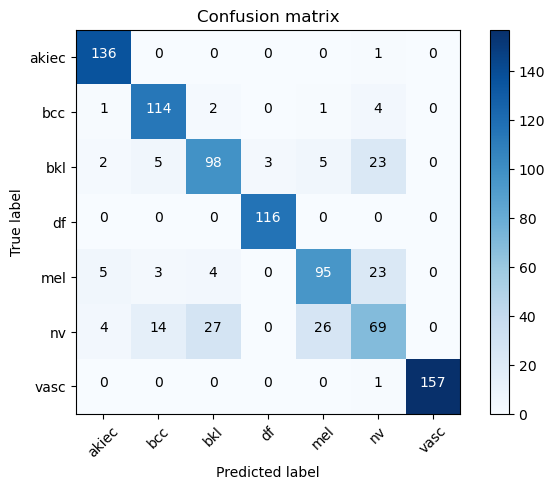

In [99]:
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
plt.savefig('../presentation/conf_mat_rfc.png', dpi = 100)
plt.show()

In [182]:
svm.fit(X_train_scaled_n,y_train_n.values)


SVC(gamma=0.5)

In [159]:
y_predict_n = svm.predict(X_test_scaled_n)

In [160]:
accuracy_score(y_test_n,y_predict_n)

0.8572493874507298

In [161]:
print(classification_report(y_test_n,y_predict_n))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1347
           1       0.82      0.93      0.87      1330
           2       0.80      0.81      0.81      1333
           3       0.97      1.00      0.99      1325
           4       0.77      0.79      0.78      1331
           5       0.76      0.49      0.59      1340
           6       0.96      1.00      0.98      1381

    accuracy                           0.86      9387
   macro avg       0.85      0.86      0.85      9387
weighted avg       0.85      0.86      0.85      9387



In [162]:
confusion_matrix(y_test_n,y_predict_n)

array([[1323,   11,    0,    0,    6,    3,    4],
       [  15, 1237,   17,    0,   34,   25,    2],
       [  29,   64, 1083,    8,   61,   78,   10],
       [   0,    0,    0, 1325,    0,    0,    0],
       [  48,   59,   63,    9, 1047,   96,    9],
       [ 105,  140,  187,   18,  206,  651,   33],
       [   0,    0,    0,    0,    0,    0, 1381]])

In [59]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

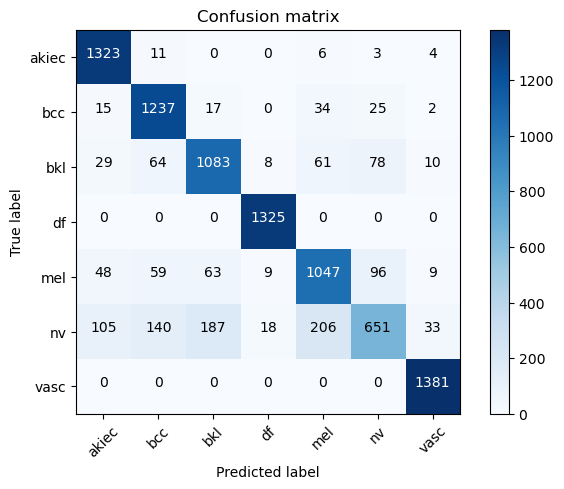

In [172]:
# codes = {'akiec':0, 'bcc':1, 'bkl':2, 'df':3, 'mel':4, 'nv':5, 'vasc':6}

confusion_mtx = confusion_matrix(y_test_n,y_predict_n)
# plot the confusion matrix
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(confusion_mtx, plot_labels)
plt.savefig('../presentation/conf_mat_svm_rbf.png', dpi = 100)
plt.show()

In [ ]:
y_predict = svm.predict(X_test_scaled)

In [67]:
print(y_predict)

[5 5 5 ... 5 5 5]


In [68]:
y_test.value_counts()

dx
5    1342
4     223
2     196
1     120
0      63
6      30
3      29
Name: count, dtype: int64

In [69]:
y_test.values

array([5, 5, 5, ..., 5, 5, 5])

In [70]:
for i in range(len(y_predict)):
    if y_predict[i]==2:
        print(i)

In [58]:
score = accuracy_score(y_test.values,y_predict)

In [59]:
rbf_f1 = f1_score(y_test.values,y_predict, average='weighted')
print('Accuracy (rbf Kernel): ', "%.2f" % (score*100))
print('F1 (rbf Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (rbf Kernel):  60.51
F1 (rbf Kernel):  52.64


In [60]:
y_predict

array([5, 5, 5, ..., 4, 5, 5])

In [ ]:
poly_pred = svm.predict(X_test)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')

print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy (Polynomial Kernel):  5.99
F1 (Polynomial Kernel):  0.68


In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_test.values,y_predict))

              precision    recall  f1-score   support

           0       0.03      0.02      0.02        63
           1       0.02      0.01      0.01       120
           2       0.15      0.05      0.08       196
           3       0.11      0.03      0.05        29
           4       0.08      0.02      0.04       223
           5       0.67      0.89      0.77      1342
           6       0.00      0.00      0.00        30

    accuracy                           0.61      2003
   macro avg       0.15      0.15      0.14      2003
weighted avg       0.48      0.61      0.53      2003



In [63]:
confusion_matrix(y_test.values, y_predict)

array([[   1,    1,    1,    0,    4,   56,    0],
       [   2,    1,    6,    1,    5,  104,    1],
       [   3,    4,   10,    3,    2,  173,    1],
       [   0,    0,    0,    1,    0,   28,    0],
       [   6,    4,    8,    0,    5,  198,    2],
       [  20,   36,   38,    4,   43, 1194,    7],
       [   1,    1,    2,    0,    1,   25,    0]])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Perform cross-validation for different values of k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,3,55]
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    svm.fit(x_val_n, y_val_n.values)
    scores = cross_val_score(knn, X_train_scaled_n, y_train_n, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(cv_scores)

# Find the optimal value of k
optimal_k = k_values[cv_scores.index(max(cv_scores))]   

[np.float64(0.9436989610797826)]
[np.float64(0.9436989610797826), np.float64(0.9006605804358914)]
[np.float64(0.9436989610797826), np.float64(0.9006605804358914), np.float64(0.8660381145450533)]
[np.float64(0.9436989610797826), np.float64(0.9006605804358914), np.float64(0.8660381145450533), np.float64(0.8282726327274336)]
[np.float64(0.9436989610797826), np.float64(0.9006605804358914), np.float64(0.8660381145450533), np.float64(0.8282726327274336), np.float64(0.7921590913604118)]
[np.float64(0.9436989610797826), np.float64(0.9006605804358914), np.float64(0.8660381145450533), np.float64(0.8282726327274336), np.float64(0.7921590913604118), np.float64(0.761158732779462)]
[np.float64(0.9436989610797826), np.float64(0.9006605804358914), np.float64(0.8660381145450533), np.float64(0.8282726327274336), np.float64(0.7921590913604118), np.float64(0.761158732779462), np.float64(0.7361505483962296)]
[np.float64(0.9436989610797826), np.float64(0.9006605804358914), np.float64(0.8660381145450533), np

In [66]:
best_cv_score = cv_scores[cv_scores.index(max(cv_scores))] 


In [67]:
print(optimal_k, best_cv_score)

1 0.9436989610797826


In [74]:
knn = KNeighborsClassifier(n_neighbors=1)


In [75]:
knn.fit(X_train_scaled_n, y_train_n.values)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       137
           1       0.81      0.94      0.87       122
           2       0.79      0.74      0.76       136
           3       0.97      1.00      0.98       116
           4       0.71      0.72      0.72       130
           5       0.64      0.41      0.50       140
           6       0.94      0.99      0.97       158

    accuracy                           0.83       939
   macro avg       0.81      0.83      0.82       939
weighted avg       0.81      0.83      0.81       939



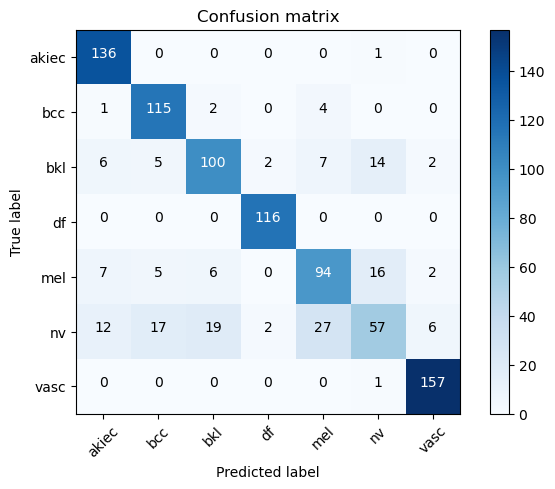

In [97]:
knn.fit(x_val_n, y_val_n.values)
y_pre_nn = knn.predict(x_test_nn)
accuracy_score(y_test_nn, y_pre_nn)
# xp = classification_report(y_test_nn,y_pre_nn)
xp = confusion_matrix(y_test_nn,y_pre_nn)
print(classification_report(y_test_nn, y_pre_nn))
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv','vasc']
plot_confusion_matrix(xp, plot_labels)
plt.savefig('../presentation/conf_mat_knn_1.png', dpi = 100)
plt.show()

In [87]:
y_pred_knn = knn.predict(X_test_scaled)

In [88]:
accuracy_score(y_test.values, y_pred_knn)

0.47728407388916627

In [89]:
print(classification_report(y_test.values,y_pred_knn))

              precision    recall  f1-score   support

           0       0.01      0.02      0.02        63
           1       0.05      0.05      0.05       120
           2       0.11      0.12      0.11       196
           3       0.00      0.00      0.00        29
           4       0.13      0.13      0.13       223
           5       0.67      0.67      0.67      1342
           6       0.00      0.00      0.00        30

    accuracy                           0.48      2003
   macro avg       0.14      0.14      0.14      2003
weighted avg       0.48      0.48      0.48      2003



In [124]:
confusion_matrix(y_test.values,y_pred_knn)

array([[  1,   2,   2,   0,   9,  47,   2],
       [  3,   6,  13,   0,  16,  79,   3],
       [  5,  12,  23,   0,  22, 129,   5],
       [  2,   1,   5,   0,   2,  19,   0],
       [ 12,  12,  23,   0,  29, 143,   4],
       [ 44,  81, 141,  11, 144, 897,  24],
       [  0,   1,   2,   1,   2,  24,   0]])

0034318


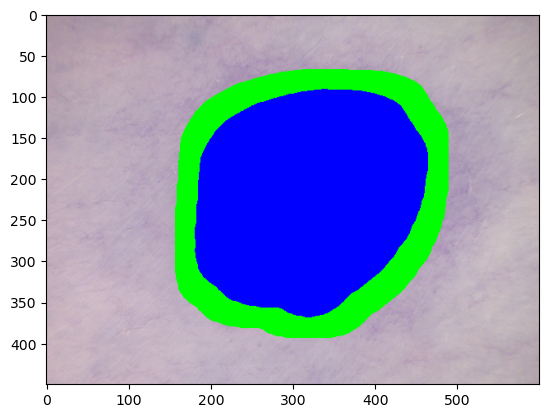

In [100]:
# from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

im_n = imgPath
imagepath = image_dir+'/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'

features ={}
im_n=['../dataset/images/ISIC_0034318.jpg']
for i in range(1):
    img = sitk.ReadImage(im_n[i])
    ll = im_n[i].split('_')[1].split('.')[0]
    print(ll)
    # print(str(labelPath), type(ll))
    imagePAth = imagepath+str(ll)+'.jpg'
    labelPath = labelpath+str(ll)+'_segmentation.png'
    label = sitk.ReadImage(labelPath)
    # Image.open
    # mask = Image.load_img(labelPath, color_mode='grayscale')
    # mask = Image.open(labelPath)
    mask = cv2.imread(labelPath)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) 

    # mask = Image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    
    # im = image.load_img(im_n[i], target_size=(224, 224))
    # im = image.img_to_array(im)
    t = cv2.imread(im_n[i])
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    # plt.imshow(img_with_contours)
    # plt.show()

    m = cv2.imread(labelPath, 0) 
    d = 50
    kernel = np.ones((d, d), np.uint8) 
    img_dilation = cv2.dilate(m, kernel, iterations=1) 
    # cv2.imshow('Dilation', img_dilation) 
    mask_contours_d, _ = cv2.findContours((img_dilation * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img_with_contours, mask_contours_d, -1, (0, 255, 0), -1)
    cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), -1)

    plt.imshow(img_with_contours)
    plt.show()
    plt.imsave('../'+im_n[i].split('_')[1].split('.')[0]+'_mask_ring_'+str(d)+'.jpg', img_with_contours)





In [82]:
final_pca_df['target']

0          nv
1          nv
2         bcc
3         mel
4          nv
        ...  
8006       nv
8007       nv
8008       nv
8009    akiec
8010      bcc
Name: target, Length: 8011, dtype: object

In [123]:
y_test.value_counts()

dx
5    1342
4     223
2     196
1     120
0      63
6      30
3      29
Name: count, dtype: int64

In [83]:
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [84]:
codes = {'akiec':0, 'bcc':1, 'bkl':2, 'df':3, 'mel':4, 'nv':5, 'vasc':6}

final_pca_df['target'].map(codes)


0       5
1       5
2       1
3       4
4       5
       ..
8006    5
8007    5
8008    5
8009    0
8010    1
Name: target, Length: 8011, dtype: int64

In [85]:
[x for x in range((7))]




[0, 1, 2, 3, 4, 5, 6]

In [86]:
final_pca_df.iloc[:,:2],


(      principal component 1  principal component 2
 0                  9.471626               4.035624
 1                  0.930324               3.270978
 2                 -2.615935              -1.606244
 3                 -3.150710               0.427219
 4                 -1.741897               0.074513
 ...                     ...                    ...
 8006              -1.721461              -0.402576
 8007              -0.645216              -1.281662
 8008              -0.937007              -1.376062
 8009              -0.871584              -1.840844
 8010              -1.891759              -0.898335
 
 [8011 rows x 2 columns],)

In [90]:
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X_train_scaled,
        response_method="predict",
        # cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel='pc1',
        ylabel='pc2'
    )

# colors = ("blue", "red", "green",'pink', 'black', 'yellow', 'orange')
# Scatter plot


plt.scatter(final_pca_df.iloc[:, 0], final_pca_df.iloc[:, 1], 
            c=final_pca_df['target'].map(codes),
 edgecolors="k")
# plt.imsave('decision_boundary.jpg')
plt.show()

ValueError: n_features must be equal to 2. Got 53 instead.

In [ ]:
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        final_pca_df.iloc[:,:2],
        response_method="predict",
        # cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel='pc1',
        ylabel='pc2'
    )

# colors = ("blue", "red", "green",'pink', 'black', 'yellow', 'orange')
# Scatter plot


plt.scatter(final_pca_df.iloc[:, 0], final_pca_df.iloc[:, 1], 
            c=final_pca_df['target'].map(codes),
 edgecolors="k")
# plt.imsave('decision_boundary.jpg')
plt.show()

/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 53 features as input.

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0          nv
1          nv
2         bcc
3         mel
4          nv
        ...  
8006       nv
8007       nv
8008       nv
8009    akiec
8010      bcc
Name: target, Length: 8011, dtype: object

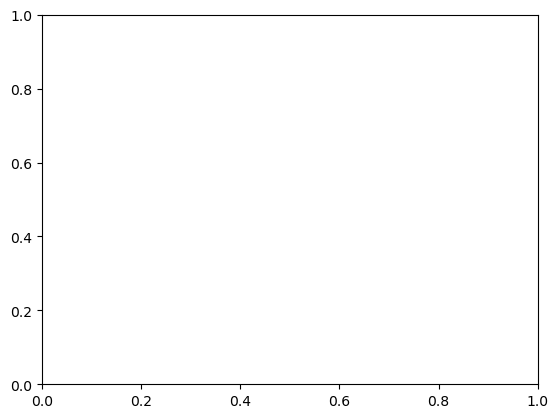

In [115]:
import numpy as np

from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

Cs = np.logspace(-5, 5, 20)
scaler = StandardScaler()
unscaled_clf = make_pipeline(pca, LogisticRegressionCV(Cs=Cs))
unscaled_clf.fit(X_train, y_train)

scaled_clf = make_pipeline(scaler, pca, LogisticRegressionCV(Cs=Cs))
scaled_clf.fit(X_train, y_train)

print(f"Optimal C for the unscaled PCA: {unscaled_clf[-1].C_[0]:.4f}\n")
print(f"Optimal C for the standardized data with PCA: {scaled_clf[-1].C_[0]:.2f}")


/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal C for the unscaled PCA: 0.0000

Optimal C for the standardized data with PCA: 0.00


In [113]:
from sklearn.metrics import accuracy_score, log_loss

y_pred = unscaled_clf.predict(X_test)
y_pred_scaled = scaled_clf.predict(X_test)
y_proba = unscaled_clf.predict_proba(X_test)
y_proba_scaled = scaled_clf.predict_proba(X_test)

print("Test accuracy for the unscaled PCA")
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print("Test accuracy for the standardized data with PCA")
print(f"{accuracy_score(y_test, y_pred_scaled):.2%}\n")
print("Log-loss for the unscaled PCA")
print(f"{log_loss(y_test, y_proba):.3}\n")
print("Log-loss for the standardized data with PCA")
print(f"{log_loss(y_test, y_proba_scaled):.3}")


Test accuracy for the unscaled PCA
65.50%

Test accuracy for the standardized data with PCA
67.00%

Log-loss for the unscaled PCA
4.14

Log-loss for the standardized data with PCA
11.9


/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [124]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5','pc6','pc7'])

pca_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_train = pd.DataFrame(y_train)
final_pca_df = pca_df
final_pca_df['target'] = y_train

In [125]:
final_pca_df

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0     9.471626  4.035624 -2.572077 -1.144321  0.091066  2.448961 -4.594112   
1     0.930324  3.270978  0.450798 -2.419170 -0.648143  3.837586  1.431099   
2    -2.615935 -1.606244 -0.196535  1.388747 -0.269112 -1.203102 -1.091455   
3    -3.150710  0.427219  0.816295  0.193559  3.095749 -0.587277 -0.175516   
4    -1.741897  0.074513  0.608220 -0.822503  2.325680 -0.194212  0.083054   
...        ...       ...       ...       ...       ...       ...       ...   
8006 -1.721461 -0.402576  0.116078  0.022479  0.620191 -1.176054 -1.248466   
8007 -0.645216 -1.281662 -0.137011 -0.178182 -1.243056  1.914879  0.153791   
8008 -0.937007 -1.376062 -0.217155 -0.359323 -0.328908  0.729456 -0.377542   
8009 -0.871584 -1.840844 -0.240047 -0.326097 -1.677317  1.637294  0.791671   
8010 -1.891759 -0.898335 -0.125251  0.268093 -0.986935  0.046176 -0.909166   

     target  
0        nv  
1        nv  
2       bcc  
3       mel  
4        nv  
...     ...  
8006     nv  
8007     nv  
8008     nv  
8009  akiec  
8010    bcc  

[8011 rows x 8 columns]

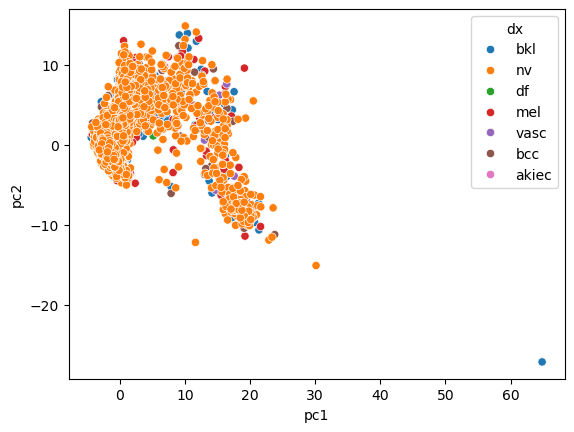

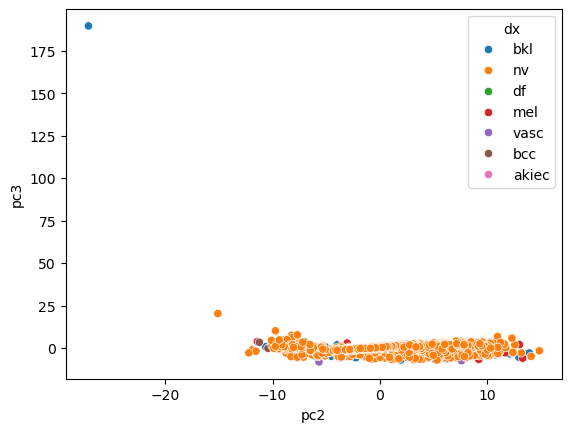

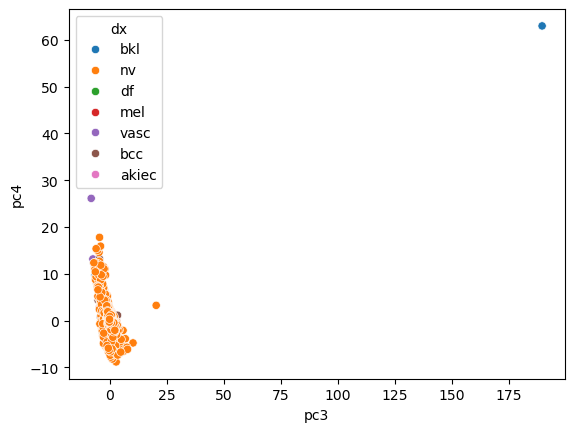

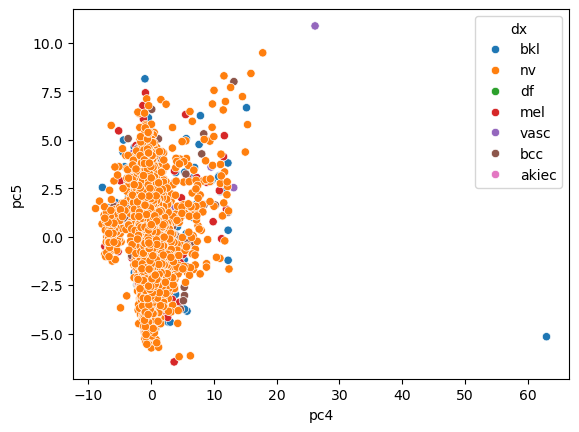

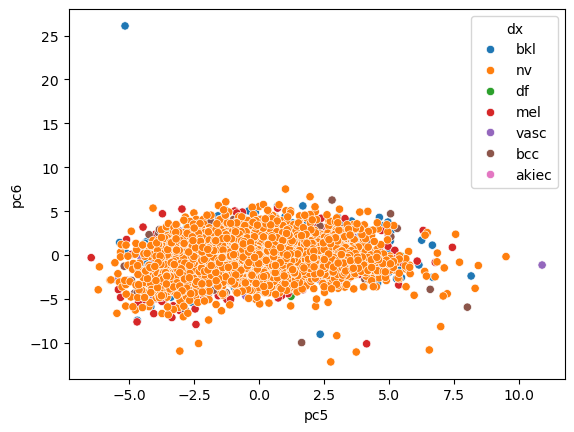

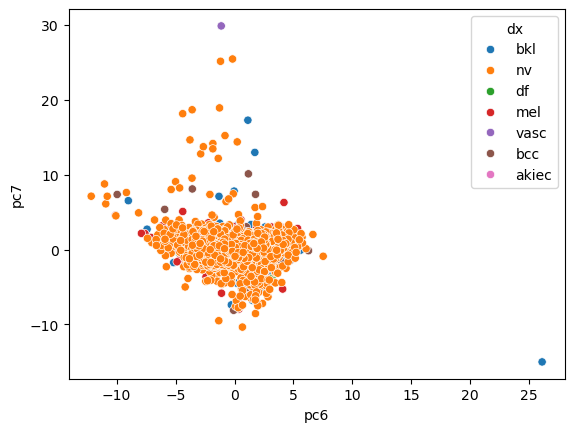

In [129]:
for i in range(6):
    ax = sns.scatterplot(x =final_pca_df.iloc[:,i], y = final_pca_df.iloc[:,i+1], 
    hue = d_radiomics['dx'],
    data=final_pca_df,
    legend=True)
    plt.show()

In [131]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(final_pca_df.iloc[:,:6],final_pca_df['target'])



SVC(gamma=0.5)

In [139]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

y_predicted = svm.predict(final_pca_df.iloc[:,:6])


resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(final_pca_df.iloc[:,0]), np.max(final_pca_df.iloc[:,0])
X2d_ymin, X2d_ymax = np.min(final_pca_df.iloc[:,1]), np.max(final_pca_df.iloc[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(final_pca_df.iloc[:,:6], y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(final_pca_df.iloc[:,0], final_pca_df.iloc[:,1], c=y)
plt.show()

/home/rbasak2/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KNeighborsClassifier is expecting 6 features as input.

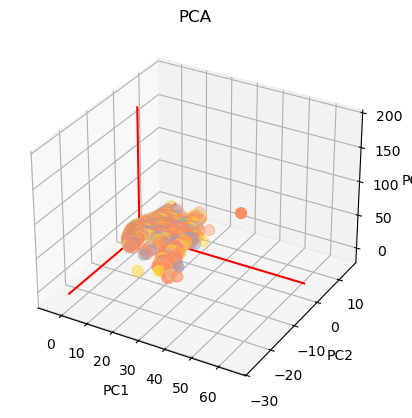

In [123]:
# Run The PCA
pca = PCA(n_components=3)
pca.fit(X_train_scaled)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(X_train_scaled), columns=['PCA%i' % i for i in range(3)])
 # Keep the 'species' column appart + make it numeric for coloring
y_ = y_train['dx']
my_color= final_pca_df['target'].map(codes) #final_pca_df['target'].cat.codes

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA")
plt.show()

In [10]:
data_pd.set_index(['image_id'], inplace=True)

In [11]:
data_pd

lesion_id     dx dx_type   age     sex localization  \
image_id                                                              
ISIC_0027419  HAM_0000118    bkl   histo  80.0    male        scalp   
ISIC_0025030  HAM_0000118    bkl   histo  80.0    male        scalp   
ISIC_0026769  HAM_0002730    bkl   histo  80.0    male        scalp   
ISIC_0025661  HAM_0002730    bkl   histo  80.0    male        scalp   
ISIC_0031633  HAM_0001466    bkl   histo  75.0    male          ear   
...                   ...    ...     ...   ...     ...          ...   
ISIC_0033084  HAM_0002867  akiec   histo  40.0    male      abdomen   
ISIC_0033550  HAM_0002867  akiec   histo  40.0    male      abdomen   
ISIC_0033536  HAM_0002867  akiec   histo  40.0    male      abdomen   
ISIC_0032854  HAM_0000239  akiec   histo  80.0    male         face   
ISIC_0032258  HAM_0003521    mel   histo  70.0  female         back   

                   dataset  
image_id                    
ISIC_0027419  vidir_modern  
ISIC_0025030  vidir_modern  
ISIC_0026769  vidir_modern  
ISIC_0025661  vidir_modern  
ISIC_0031633  vidir_modern  
...                    ...  
ISIC_0033084  vidir_modern  
ISIC_0033550  vidir_modern  
ISIC_0033536  vidir_modern  
ISIC_0032854  vidir_modern  
ISIC_0032258  vidir_modern  

[10015 rows x 7 columns]

In [12]:
for image in img_list:
    file_name = image + '.jpg'
    # print(file_name)
    label = data_pd.loc[image, 'dx']
    # print(label)
    # path of source image 
    source = os.path.join(image_dir, file_name)

    # copying the image from the source to target file
    target = os.path.join( label, file_name)

    shutil.copyfile(source, target)

In [13]:
import glob
import cv2
imgPath = []
for img in glob.glob('mel/*.jpg'):
    n = sitk.ReadImage(img)
    imgPath.append(n)

lblPath = []
for label in glob.glob('../dataset/HAM10000_segmentations_lesion_tschandl/*.png'):
    l = sitk.ReadImage(label)
    lblPath.append(l)


In [ ]:
filters = {
    "AdditiveGaussianNoise" : sitk.AdditiveGaussianNoiseImageFilter(),
    "Bilateral" : sitk.BilateralImageFilter(),
    "BinomialBlur" : sitk.BinomialBlurImageFilter(),
    "BoxMean" : sitk.BoxMeanImageFilter(),
    "BoxSigmaImageFilter" : sitk.BoxSigmaImageFilter(),
    "CurvatureFlow" : sitk.CurvatureFlowImageFilter(),
    "DiscreteGaussian" : sitk.DiscreteGaussianImageFilter(),
    "LaplacianSharpening" : sitk.LaplacianSharpeningImageFilter(),
    "Mean" : sitk.MeanImageFilter(),
    "Median" : sitk.MedianImageFilter(),
    "Normalize" : sitk.NormalizeImageFilter(),
    "RecursiveGaussian" : sitk.RecursiveGaussianImageFilter(),
    "ShotNoise" : sitk.ShotNoiseImageFilter(),
    "SmoothingRecursiveGaussian" : sitk.SmoothingRecursiveGaussianImageFilter(),
    "SpeckleNoise" : sitk.SpeckleNoiseImageFilter(),
}

ValueError: Error reading image Filepath or SimpleITK object

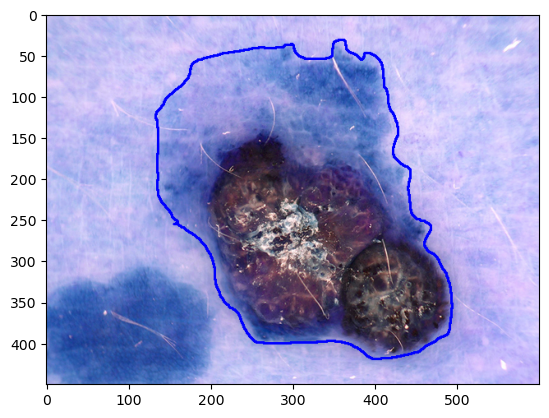

In [ ]:
from tensorflow.keras.preprocessing import image

import os
import yaml
# radiomics.setVerbosity(logging.INFO)

params_path = os.path.join(os.getcwd(), 'Params.yaml')
with open(params_path, 'r') as file:
    params = yaml.safe_load(file)

im_n = [ '0024545', '0024640','0025153','0034243','0033624']
imagepath = 'mel/ISIC_' #0024310.jpg'
labelpath = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_' #0024310_segmentation.png'
labelpath_2 = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_0024351_segmentation.png'

features = {}
for i in range(len(im_n)):
    img = sitk.ReadImage(imagepath+im_n[i]+'.jpg')
    label = sitk.ReadImage(labelpath+im_n[i]+'_segmentation.png')
    mask = image.load_img(labelpath+im_n[i]+'_segmentation.png', color_mode='grayscale')
    mask = image.img_to_array(mask) / 255.0
    mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # print(cv2.imread(labelpath_1))

    
    im = image.load_img(imagepath+im_n[i]+'.jpg', target_size=(224, 224))
    im = image.img_to_array(im)
    t = cv2.imread(imagepath+im_n[i]+'.jpg')
    img_with_contours = t.copy()
    # # Draw the border of the segmentation mask with a blue line
    cv2.drawContours(img_with_contours, mask_contours, -1, (0, 0, 255), 2)
    plt.imshow(img_with_contours)
    plt.imsave(imagepath+im_n[i]+'_mask.jpg', img_with_contours)
    plt.imsave(imagepath+im_n[i]+'_or.jpg', t)

    maskpath_1 = imagepath+im_n[i]+'_mask.jpg'
    impath_1 =imagepath+im_n[i]+'_or.jpg'
    mask_1 = sitk.ReadImage(maskpath_1)
    im_1 = sitk.ReadImage(impath_1)

#     plt.figure(figsize=(20,20))
# # First image
#     plt.subplot(2,2,1)
#     plt.imshow(sitk.GetArrayFromImage(im_1))
#     plt.title("Img #1")
#     plt.subplot(2,2,2)
#     plt.imshow(sitk.GetArrayFromImage(mask_1))        
#     plt.title("Segmentation #1")
    
    # mask_1 = sitk.ReadImage(maskpath_1)
    # im_1 = sitk.ReadImage(impath_1)
    # # binary_mask = sitk.BinaryThreshold(ss, lowerThreshold=1, upperThreshold=1, insideValue=1, outsideValue=0)
    # # plt.imshow()# print(label)
    single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
    # extract_filter.SetComponentIndex(0)  # 0 is for the first channel (red), 1 for green, 2 for blue
    # single_channel_image = extract_filter.Execute(im_1)
    # plt.imshow(sitk.GetArrayFromImage(single_channel_image))
    # plt.imshow(sitk.GetArrayFromImage(mask_1))

    extractor = featureextractor.RadiomicsFeatureExtractor(params)
    # extractor.enableAllFeatures()
    # extractor.disableFeatureByName(["JointAverage"])
    extractor.disableAllFeatures()
    extractor.enableFeatureClassByName('firstorder')
    # print('')
    # print('Enabled features:\n\t', extractor.enabledFeatures)

    # extractor.enableFeatureClassByName('shape2D')
    result = extractor.execute(single_channel_image, mask_1)
    # print(result)
    # print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
    # # print('')
    # print('Calculated features')
    features[i] = extractor.execute ( image, mask, label=6 )

    for key, value in six.iteritems(result):
        if key.startswith('original_firstorder_'):
            print('\t', key, ':', value)

    # Make a numpy array of all the values
    import numpy as np

    samples = np.zeros((10,len(feature_names)))
    for case_id in range(1,11):
        a = np.array([])
        for feature_name in feature_names:
            a = np.append(a, features[case_id][feature_name])
        samples[case_id-1,:] = a
        
    # May have NaNs
    samples = np.nan_to_num(samples)

In [67]:
from tensorflow.keras.preprocessing import image
mask = image.load_img(labelpath_2, color_mode='grayscale')
print(labelpath_2)

../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_0024351_segmentation.png


In [40]:
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
        
mask = image.load_img(labelpath_2, color_mode='grayscale')
mask = image.img_to_array(mask) / 255.0
mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(cv2.imread(labelpath_2))

# img = image.load_img(imagepath_1)
# img = image.img_to_array(img)
# t = cv2.imread(imagepath_1)
# img_with_contours = t.copy()
# # Draw the border of the segmentation mask with a blue line
ss = cv2.drawContours(img_with_contours, mask_contours, -1, (0, 1, 0), -1)
binary_mask = sitk.BinaryThreshold(ss, lowerThreshold=1, upperThreshold=1, insideValue=1, outsideValue=0)
plt.imshow()
# plt.imshow(img_with_contours)
# plt.imsave('mel/'+im_1+'_mask.jpg', img_with_contours)

# plt.imsave('mel/'+im_1+'_org.jpg', t)
# plt.imshow(t)
# ax.set_title(f'Image ID: {image_id}')
# ax.axis('off')

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


TypeError: in method 'BinaryThreshold', argument 1 of type 'itk::simple::Image const &'

In [20]:
maskpath_1 = 'mel/'+im_1+'_mask.jpg'
impath_1 = 'mel/'+im_1+'_org.jpg'
mask_1 = sitk.ReadImage(maskpath_1)
im_1 = sitk.ReadImage(impath_1)



TypeError: can only concatenate str (not "Image") to str

In [21]:
import os
import yaml
# radiomics.setVerbosity(logging.INFO)

params_path = os.path.join(os.getcwd(), 'Params.yaml')
with open(params_path, 'r') as file:
    params = yaml.safe_load(file)

single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
# extract_filter.SetComponentIndex(0)  # 0 is for the first channel (red), 1 for green, 2 for blue
# single_channel_image = extract_filter.Execute(im_1)
# plt.imshow(sitk.GetArrayFromImage(single_channel_image))
# plt.imshow(sitk.GetArrayFromImage(mask_1))

extractor = featureextractor.RadiomicsFeatureExtractor(params)
extractor.enableAllFeatures()
# extractor.disableFeatureByName(["JointAverage"])

# extractor.enableFeatureClassByName('shape2D')
result = extractor.execute(single_channel_image, mask_1)

print(result)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0.1'), ('diagnostics_Versions_Numpy', '2.1.1'), ('diagnostics_Versions_SimpleITK', '2.0.0rc2.dev910-ga138e'), ('diagnostics_Versions_PyWavelet', '1.7.0'), ('diagnostics_Versions_Python', '3.10.15'), ('diagnostics_Configuration_Settings', {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 2, 'weightingNorm': None}), ('diagnostics_Configuration_EnabledImageTypes', {'Original': {}}), ('diagnostics_Image-original_Hash', '8d49b7435e9746b66985ac4da9545c03649fee1a'), ('diagnostics_Image-original_Dimensionality', '2D'), ('diagnostics_Image-original_Spacing', (0.254, 0.254)), ('diagnostics_Image-original_Size', (600, 450)), ('diagnostics_Image-original

In [22]:
print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
for key, value in six.iteritems(result):
    print('\t', key, ':', value)

Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.1
	 diagnostics_Versions_Numpy : 2.1.1
	 diagnostics_Versions_SimpleITK : 2.0.0rc2.dev910-ga138e
	 diagnostics_Versions_PyWavelet : 1.7.0
	 diagnostics_Versions_Python : 3.10.15
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 2, 'weightingNorm': None}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : 8d49b7435e9746b66985ac4da9545c03649fee1a
	 diagnostics_Image-original_Dimensionality : 2D
	 diagnostics_Image-original_Spacing : (0.254, 0.254)
	 diagnostics_Image-original_Size : (600, 450)
	 diagnos

In [92]:
pip install torch

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

densenet = tf.keras.applications.DenseNet121(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,

)
# Exclude the last 28 layers of the model.
conv = densenet.layers[-28].output

ValueError: object __array__ method not producing an array

In [102]:
import torch
import torch.nn as nn
# import torchvision.models as models
from tensorflow.keras import datasets, layers, models


# Fonction pour initialiser le modèle
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    model_ft = None
    input_size = 0

    # Vérifier si le modèle demandé est 'inception'
    if model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        # Charger le modèle InceptionV3 avec des poids pré-entraînés (ImageNet par défaut)
        model_ft = models.inception_v3(pretrained=use_pretrained)

        # Fonction pour geler ou ajuster les paramètres du modèle selon l'option 'feature_extract'
        set_parameter_requires_grad(model_ft, feature_extract)

        # Traiter le réseau auxiliaire (AuxLogits)
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)

        # Traiter le réseau principal (fc)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc= nn.Linear(num_ftrs, num_classes)

        # Définir la taille d'entrée attendue par le modèle
        input_size = 299  # Taille d'entrée pour InceptionV3

    else:
        # Si le modèle spécifié n'est pas supporté, afficher un message d'erreur et arrêter l'exécution
        print("Nom du modèle invalide, sortie...")
        exit()

    # Retourner le modèle initialisé et la taille d'entrée
    return model_ft, input_size

2025-01-02 23:12:45.944323: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-02 23:12:46.195183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-02 23:12:46.281399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-02 23:12:46.306482: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-02 23:12:46.475492: I tensorflow/core/platform/cpu_feature_guar

In [100]:
import torchvision

ModuleNotFoundError: No module named 'torchvision'

In [ ]:
import torch

# Paramètres du modèle
model_name = "inception"  
num_classes = 7 
feature_extract = False  

# Initialisation du modèle avec les paramètres définis ci-dessus
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Définir l'appareil (GPU ou CPU) sur lequel le modèle sera exécuté
device = torch.device('cuda:0')  # Utilisation du GPU (cuda:0 pour le premier GPU disponible)
# Si vous souhaitez utiliser le CPU au lieu du GPU, vous pouvez décommenter la ligne suivante :
# device = torch.device('cpu')  # Utilisation du CPU

# Déplacer le modèle sur l'appareil sélectionné (GPU ou CPU)
model = model_ft.to(device)

# Vérification que le modèle est bien sur l'appareil choisi
print(f"Le modèle est placé sur : {device}")

AttributeError: module 'keras.api.models' has no attribute 'inception_v3'

In [115]:
pip install tensorflow==2.9  # For compatibility with pre-trained weights


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 91.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 32.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tens

In [116]:
from tensorflow.keras.applications import InceptionV3

model = InceptionV3(weights='imagenet')  # Weights from ImageNet for classification


ValueError: object __array__ method not producing an array

In [117]:
from tensorflow.keras.applications import InceptionV3

try:
    model = InceptionV3(weights='imagenet')  # Load model with ImageNet weights
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error: {e}")

Error: object __array__ method not producing an array


In [118]:
from tensorflow.keras.applications import InceptionV3

try:
    model = InceptionV3(weights=None)  # Load the model without pre-trained weights
    print("Model loaded without weights.")
except Exception as e:
    print(f"Error: {e}")

Model loaded without weights.


In [119]:
from tensorflow.keras.applications import MobileNetV2

try:
    model = MobileNetV2(weights='imagenet')  # Load MobileNetV2 with ImageNet weights
    print("MobileNetV2 model loaded successfully.")
except Exception as e:
    print(f"Error: {e}")

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Error: object __array__ method not producing an array


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

IMG_SIZE = (299, 299)
NUM_CLASSES = 10
BATCH_SIZE = 32
EPOCHS = 10

model = InceptionV3(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))


ValueError: object __array__ method not producing an array

In [47]:
from imblearn.over_sampling import RandomOverSampler    # to balance an imbalanced dataset.
# Initializing the RandomOverSampler object with a specified random_state for reproducibility.
ROS = RandomOverSampler(random_state = 42)

# This method generates a balanced dataset by oversampling the minority class
x_resampled, y_resampled = ROS.fit_resample(X, y)

In [138]:
print(len(y_resampled))


46935


In [139]:
print(x_resampled.shape)

(46935, 38)
